In [1]:
import numpy as np
import matplotlib.pyplot as plt

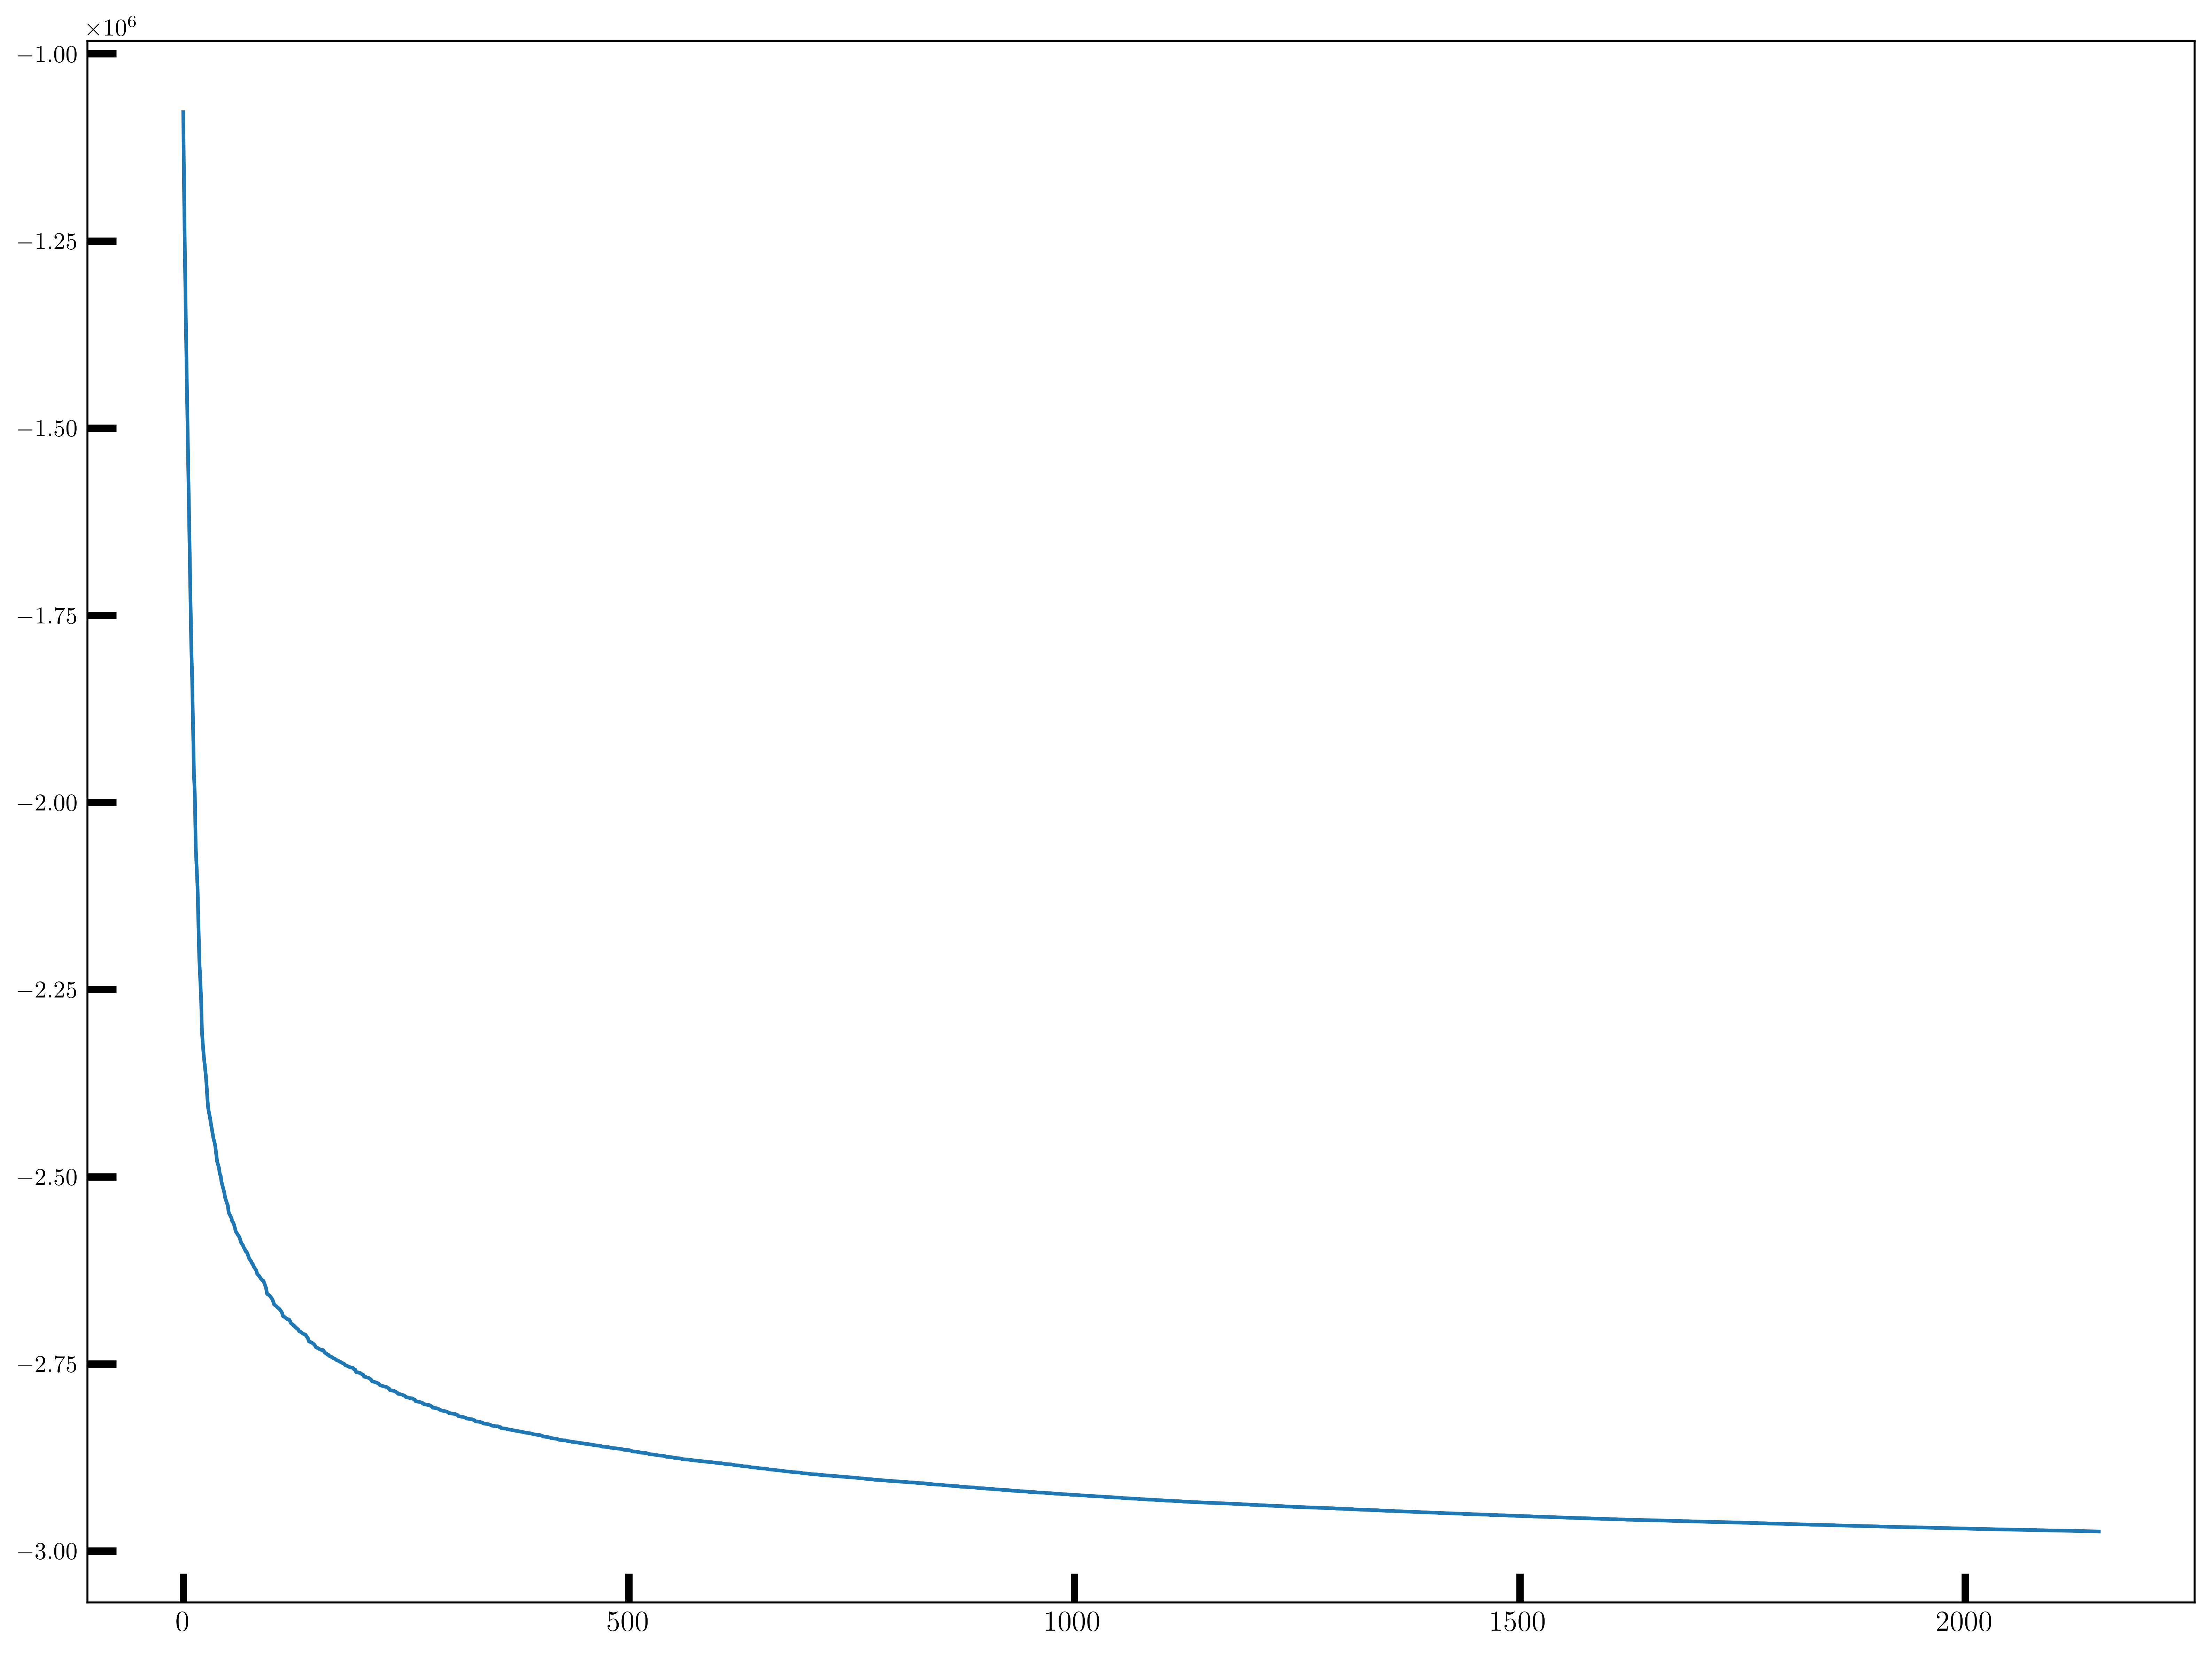

In [2]:
xvg_e = "potential.xvg"
x, e = np.loadtxt(xvg_e, comments=['#','@'], unpack=True)
plt.plot(x,e)

Text(0, 0.5, 'Temp (K)')

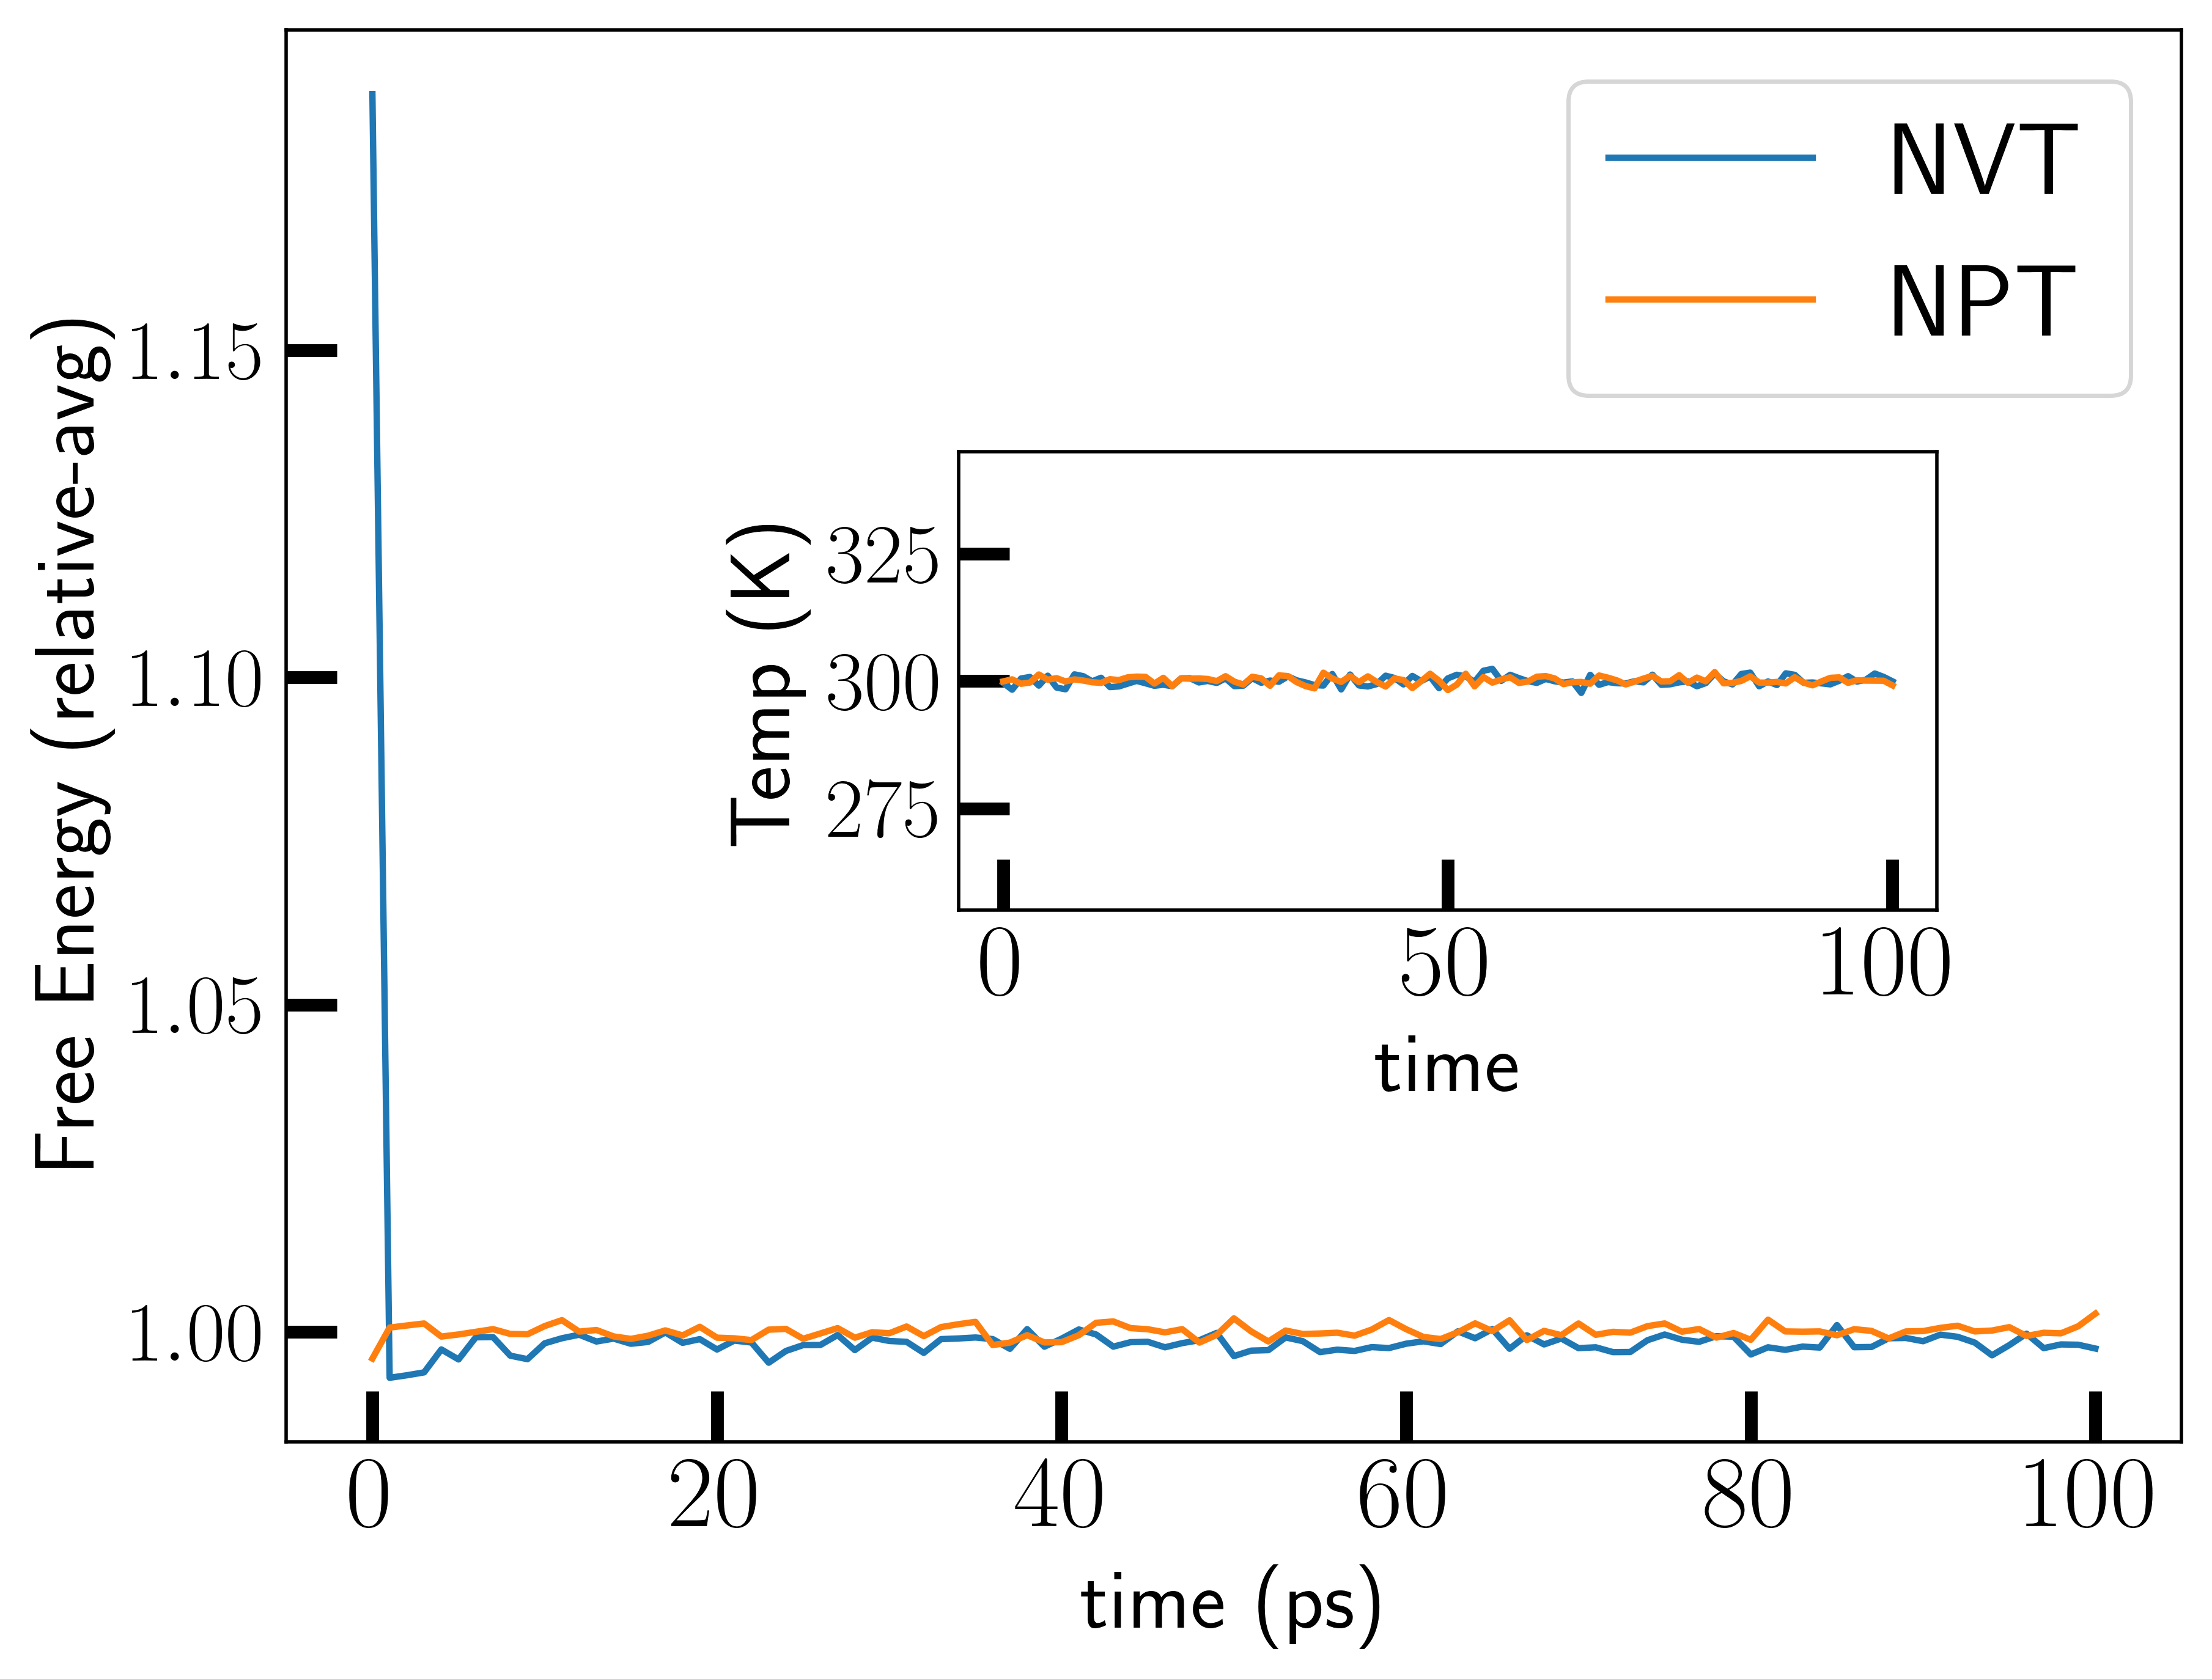

In [31]:
nvt_pfname = "nvt_pressure.xvg"  
nvt_tfname = "nvt_temperature.xvg"  
nvt_efname = "nvt_totalenergy.xvg"

t1, en = np.loadtxt(nvt_efname, comments=['#','@'], unpack=True)
en = en/np.average(en)

t2, tmp_nvt = np.loadtxt(nvt_tfname, comments=['#','@'], unpack=True)
t3, p = np.loadtxt(nvt_pfname, comments=['#','@'], unpack=True)

npt_rfname = "npt_density.xvg"  
npt_efname = "npt_enthalpy.xvg"  
npt_tfname = "npt_temperature.xvg"
t4, rho = np.loadtxt(npt_rfname, comments=['#','@'], unpack=True)
t5, enth = np.loadtxt(npt_efname, comments=['#','@'], unpack=True)
enth = enth/np.average(enth)
t6, tmp_npt = np.loadtxt(npt_tfname, comments=['#','@'], unpack=True)

fig, ax1 = plt.subplots(figsize=(8,6))
fig.set_tight_layout(False)

ax1.plot(t1, en, label='NVT')
ax1.plot(t5, enth, label='NPT')
ax1.set_xlabel('time (ps)')
ax1.set_ylabel('Free Energy (relative-avg)')
ax1.legend(loc='best')

left, bottom, width, height = [0.4, 0.4, 0.4, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(t2, tmp_nvt, label='NVT')
ax2.plot(t6, tmp_npt, label='NPT')
ax2.set_ylim((255,345))
ax2.set_xlabel('time')
ax2.set_ylabel('Temp (K)')

Text(0.5, 0, 'time (ns)')

/usr/local/anaconda3/anaconda3/envs/hpc/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/usr/local/anaconda3/anaconda3/envs/hpc/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


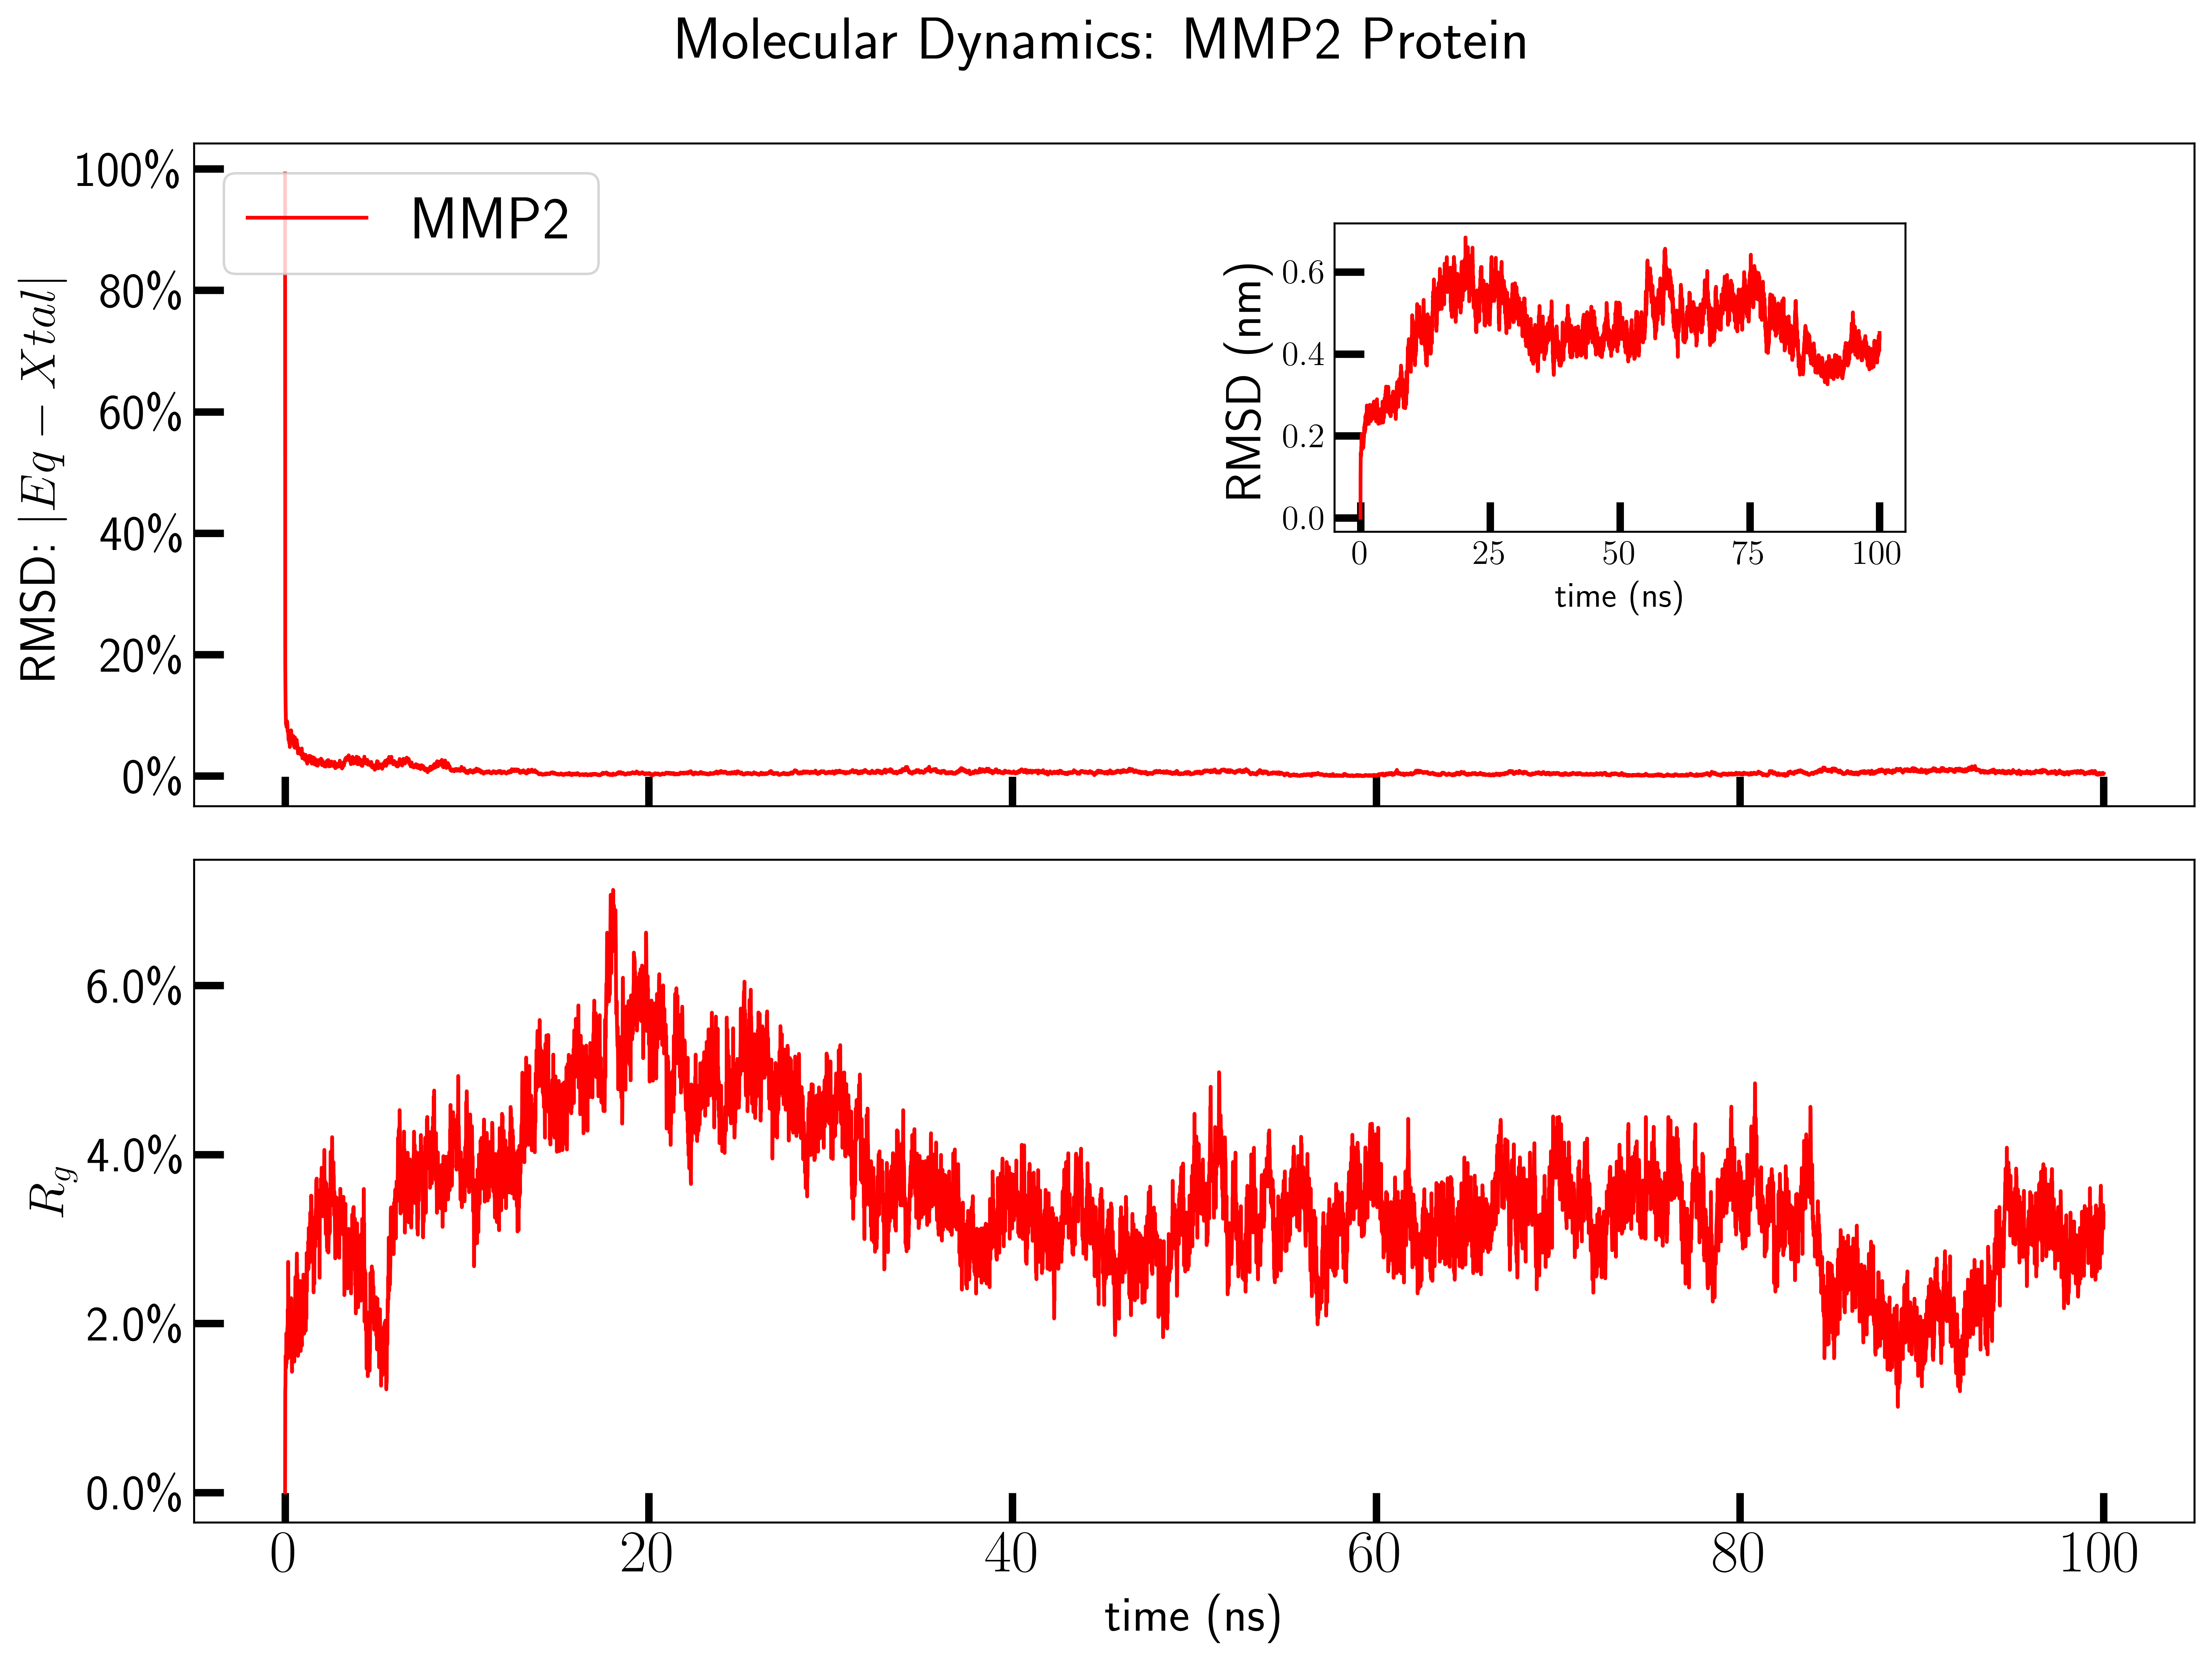

In [58]:
import matplotlib
import matplotlib.ticker as mtick
matplotlib.rc('font', size=20)
md_rmsfname = "md_rmsd_longer.xvg"
md_rmsxtalfname = "md_rmsd_xtal_longer.xvg"
md_gyrate = "gyrate_longer.xvg"

t1, rms = np.loadtxt(md_rmsfname, comments=['#','@'], unpack=True)
t2,rms_xtal = np.loadtxt(md_rmsxtalfname, comments=['#','@'], unpack=True)
t3,rg, rgx, rgy, rgz = np.loadtxt(md_gyrate, comments=['#','@'], unpack=True)

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)
fig.suptitle('Molecular Dynamics: MMP2 Protein')
ax1.plot(t2, 100 * np.abs(rms - rms_xtal)/rms_xtal, color="red", label="MMP2")
ax1.set_ylabel(r'RMSD: $\left\vert Eq-Xtal \right\vert$')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.legend(loc='upper left')

left, bottom, width, height = [0.6, 0.68, 0.25, 0.18]
axi = fig.add_axes([left, bottom, width, height])
fs = 14
axi.plot(t1,rms, label="RMSD, Ref: Equilibriated", color="red")
axi.set_xlabel("time (ns)",fontsize=fs)
axi.set_ylabel("RMSD (nm)")
axi.tick_params(labelsize=fs)

ax2.plot(t3/1000, 100 * (rg-rg[0])/rg[0], label=r"$R_g$", color='red')
ax2.set_ylabel(r"$R_g$")
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

ax2.set_xlabel("time (ns)")

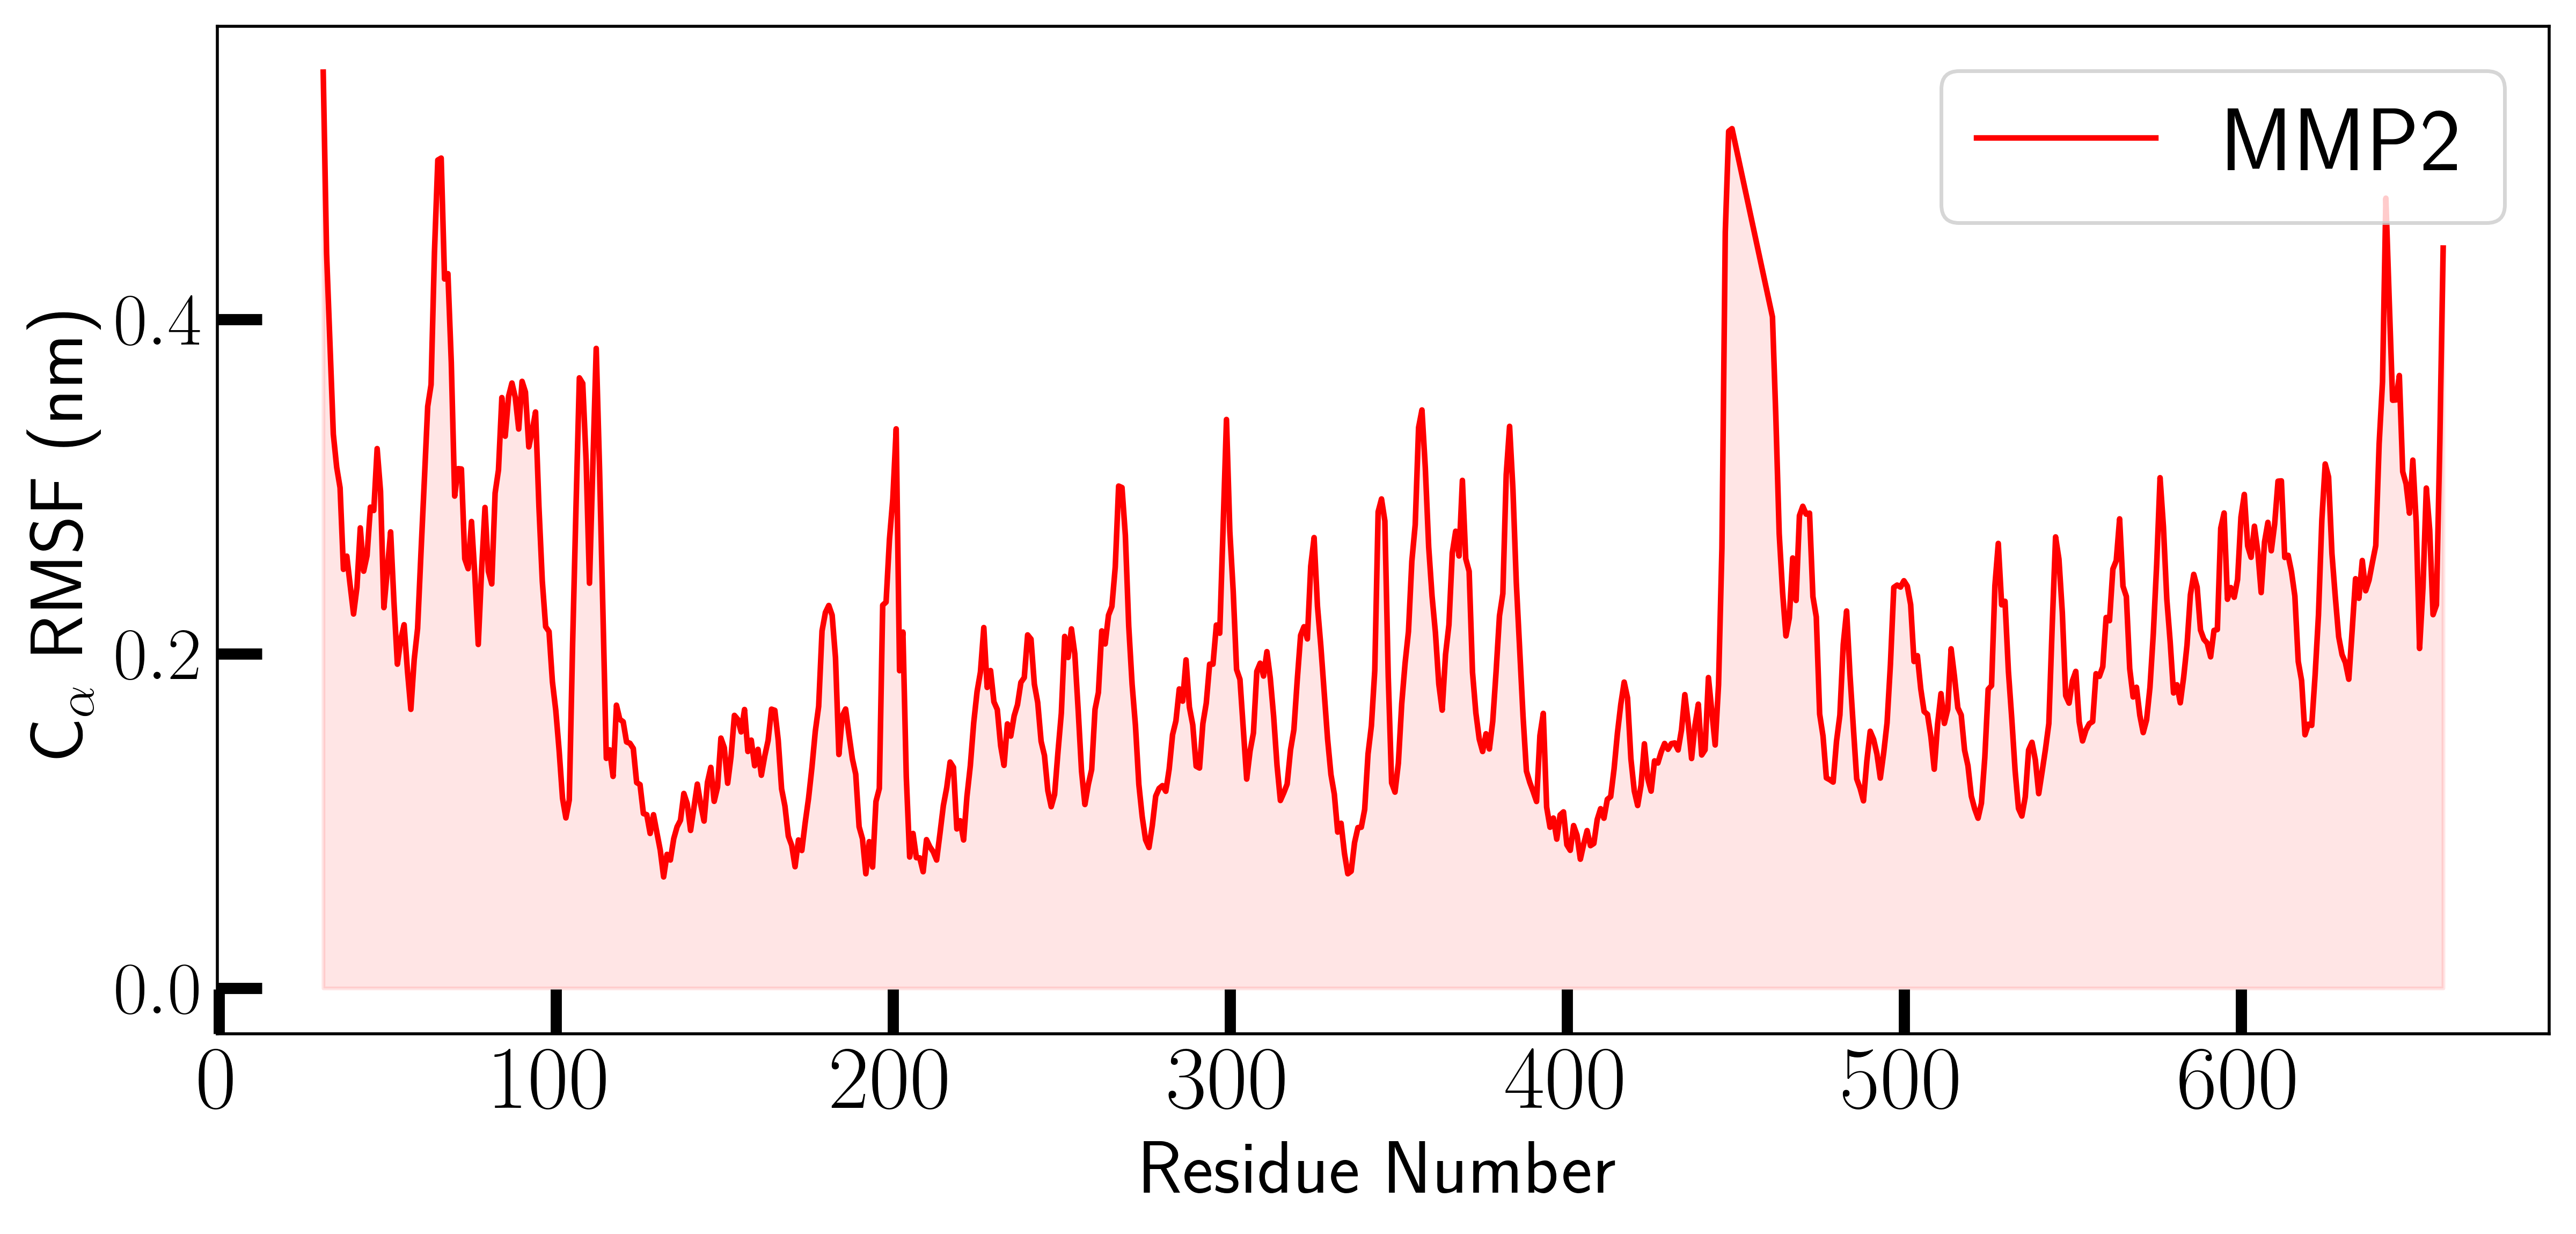

In [62]:
import matplotlib.pyplot as plt
import numpy as np

res,rmsf = np.loadtxt("rmsf_longer.xvg", comments=["@", "#"], unpack=True)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.fill_between(res,rmsf, color="red", linestyle="-", alpha=0.1)

ax.plot(res,rmsf, color="red", linestyle="-", label="MMP2")
ax.set_xlabel("Residue Number")
ax.set_ylabel(r"C$_\alpha$ RMSF (nm)")
ax.legend(loc="upper right")